In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## Simple OLS Linear Regression

The first step is to generate some loosely correlated data

In [2]:
plt.style.use('seaborn')

Make an explicit linear model for the data

In [54]:
n = 200

In [4]:
# #Randomly sample X values
# X = np.random.normal(loc=80,scale=1,size=n)
# y = 0.65 * X + 20 + np.random.normal(size=n,scale=0.4) 

In [5]:
bias = 20
noise = 6
X, y, coef = make_regression(n_samples=n,n_features=1,n_informative=1,
               n_targets=1,coef=True, noise=noise,bias=bias,
                             random_state=400)
print(coef,bias)
y = y.reshape(-1,1)

10.989435817146653 20


Raw data plot

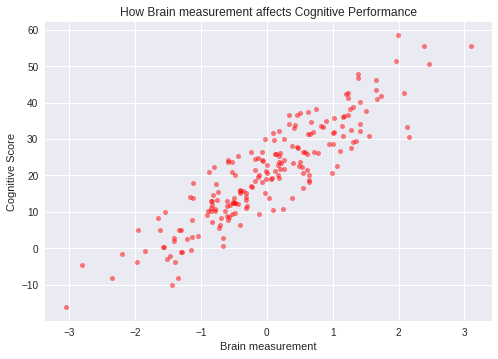

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(X,y,'r.',alpha=0.5,markersize=10)
ax1.set_xlabel('Brain measurement')
ax1.set_ylabel('Cognitive Score')
ax1.set_title('How Brain measurement affects Cognitive Performance')
plt.savefig('../figures/linear_brvscog.png')
plt.show()

A guess at what may be a good way to predict data

In [7]:
predx = np.linspace(-5,5,200)

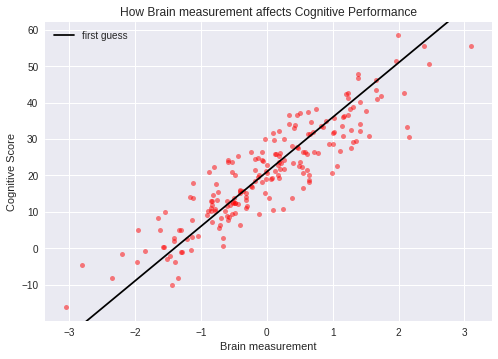

In [59]:
guess1 = (coef + 4) * predx + (bias + 1)
fig, ax = plt.subplots()
ax.plot(X,y,'r.',alpha=0.5,markersize=10)
ax.plot(predx,guess1,'k',label='first guess')
ax.set_xlabel('Brain measurement')
ax.set_ylabel('Cognitive Score')
ax.set_title('How Brain measurement affects Cognitive Performance')
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
ax.legend()
plt.savefig('../figures/linear_brvscog_guessfit.png')
plt.show()

Make some more guesses about what the data looks like and be explicit about the model

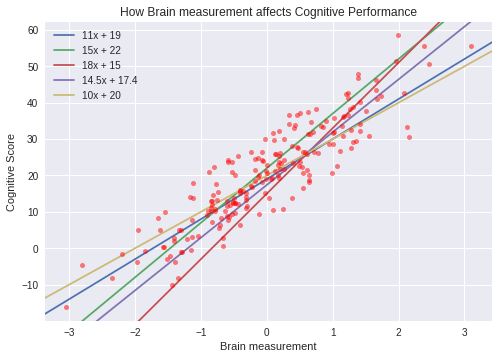

In [49]:
fig, ax = plt.subplots()
guess_tuples = [
    (11, 19),
    (15, 22),
    (18, 15),
    (14.5, 17.4),
    (10, 20),
]

for guess in guess_tuples:
    ax.plot(predx, guess[0] * predx + guess[1], 
           label=r'{}x + {}'.format(guess[0],guess[1]))

ax.plot(X,y,'r.',alpha=0.5,markersize=10)
ax.set_xlabel('Brain measurement')
ax.set_ylabel('Cognitive Score')
ax.set_title('How Brain measurement affects Cognitive Performance')
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
ax.legend()
plt.savefig('../figures/linear_brvscog_manyguesses.png')
plt.show()

Make more data to show the goal of machine learning

In [55]:
newX = np.random.normal(loc=0,scale=1,size=30)
newy = coef * newX + bias + np.random.normal(size=30,scale=noise) 

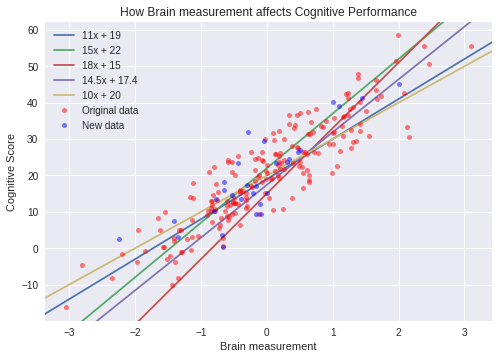

In [56]:
fig, ax = plt.subplots()
for guess in guess_tuples:
    ax.plot(predx, guess[0] * predx + guess[1], 
           label=r'{}x + {}'.format(guess[0],guess[1]))

ax.plot(X,y,'r.',alpha=0.5,markersize=10,label='Original data')
ax.plot(newX,newy,'b.',alpha=0.5,markersize=10,label='New data')
ax.set_xlabel('Brain measurement')
ax.set_ylabel('Cognitive Score')
ax.set_title('How Brain measurement affects Cognitive Performance')
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
ax.legend()
plt.savefig('../figures/linear_brvscog_manyguesses_newdata.png')
plt.show()

Sub-sample before least squares

In [57]:
sub_ind = np.random.choice(np.arange(0,X.shape[0]),size=20,replace=False)
sub_X = X[sub_ind]
sub_y = y[sub_ind]

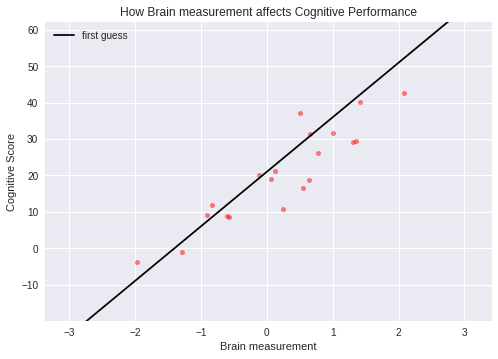

In [60]:
fig, ax = plt.subplots()
ax.plot(sub_X,sub_y,'r.',alpha=0.5,markersize=10)
ax.plot(predx,guess1,'k',label='first guess')
ax.set_xlabel('Brain measurement')
ax.set_ylabel('Cognitive Score')
ax.set_title('How Brain measurement affects Cognitive Performance')
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
ax.legend()
plt.savefig('../figures/linear_brvscog_subset.png')
plt.show()

Now we'll draw a line between each point and our guess to demonstrate the residuals. Then we'll calculate a total score!

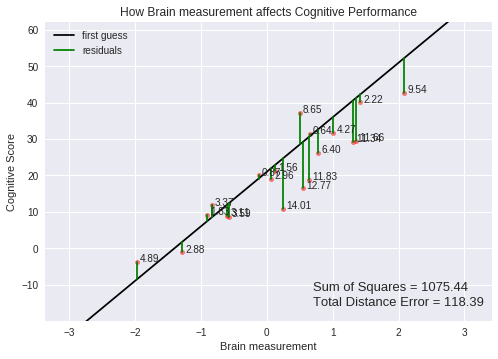

In [62]:
guess = 0.5 * predx + 31.5

make_pred = lambda x: (coef + 4) * x + (bias + 1)
fig, ax = plt.subplots()
ax.plot(sub_X,sub_y,'r.',alpha=0.5,markersize=10)
ax.plot(predx,guess1,'k',label='first guess')

#For each subsample connect it to our guess function
lines = []
texts = []
residual_total = 0
sum_of_squares = 0
for s in np.arange(0,sub_X.shape[0]):

    #Show line
    sx = sub_X[s]
    sy = sub_y[s]
    resid_x = np.array([sx, sx])
    resid_y = np.array([make_pred(sx),sy])
    lines.append(ax.plot( resid_x,
             resid_y,'g'))
    residual = abs(resid_y[1] - resid_y[0])
    ax.text(sx+0.05,sy,'{:.2f}'.format(residual[0]))
    residual_total += residual
    sum_of_squares += residual**2
    
ax.text(0.6,0.05,'Total Distance Error = {:.2f}'.format(residual_total[0]),
        transform=ax.transAxes, fontsize=13)
ax.text(0.6,0.1,'Sum of Squares = {:.2f}'.format(sum_of_squares[0]),
       transform=ax.transAxes, fontsize=13)
ax.plot(resid_x,resid_y,'g',label='residuals')
ax.set_xlabel('Brain measurement')
ax.set_ylabel('Cognitive Score')
ax.set_title('How Brain measurement affects Cognitive Performance')
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
ax.legend()

plt.savefig('../figures/linear_brvscog_residuals.png')
plt.show()

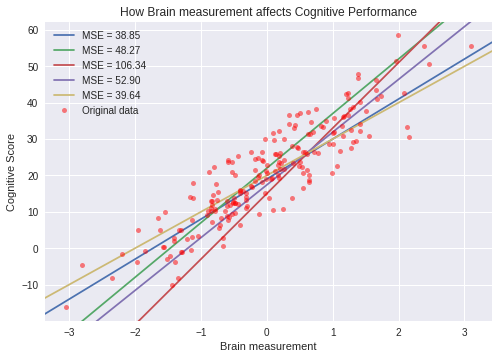

In [65]:
guess_tuples = [
    (11, 19),
    (15, 22),
    (18, 15),
    (14.5, 17.4),
    (10, 20),
]
fig, ax = plt.subplots()
for guess in guess_tuples:
    
    guess_x = guess[0]*X + guess[1]
    mse = np.sum( (y - guess_x)**2 )/n
    
    ax.plot(predx, guess[0] * predx + guess[1], 
           label=r'MSE = {:.2f}'.format(mse))
    

ax.plot(X,y,'r.',alpha=0.5,markersize=10,label='Original data')
ax.set_xlabel('Brain measurement')
ax.set_ylabel('Cognitive Score')
ax.set_title('How Brain measurement affects Cognitive Performance')
ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
ax.legend()
plt.savefig('../figures/linear_brvscog_manyguesses_residuals.png')
plt.show()

Make an error landscape for the problem

In [66]:
w0_grid = np.linspace(0,50,200)
w1_grid = np.linspace(-10,20,200)
w0_mesh, w1_mesh = np.meshgrid(w0_grid,w1_grid)

#Grid evaluation
sse = np.zeros_like(w0_mesh)
for i in np.arange(w0_mesh.shape[0]):
    for j in np.arange(w0_mesh.shape[1]):
        
        guess_x = (w1_mesh[i][j] * X) + w0_mesh[i][j]
        sse[i][j] = 1/n * np.sum( np.square(y - guess_x) )

Plot contour/surface plot check data!???

In [67]:
minind = np.argmin(sse)
min_w0 = w0_mesh.flatten()[minind]
min_w1 = w1_mesh.flatten()[minind]

best_x = coef * X + bias
min_x = min_w1*X + min_w0

best_sse = 1/n * np.sum(np.square(y-best_x))
min_sse = 1/n * np.sum( np.square(y-min_x) )

print(best_sse, min_sse)
print(min_w0,min_w1)
print(0,coef)


36.72041424650455 35.571308092738406
20.60301507537688 11.85929648241206
0 10.989435817146653


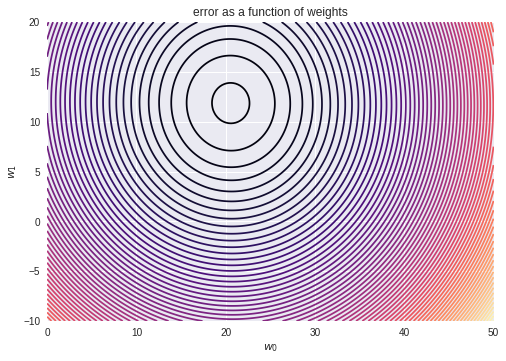

In [68]:
fig, ax = plt.subplots()
ax.contour(w0_mesh,w1_mesh,sse,levels=70,cmap='magma')
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_title('error as a function of weights')
plt.savefig('../figures/contour_surf.png')
plt.show()

(-3.3603357473759976, 3.4143515843843844)

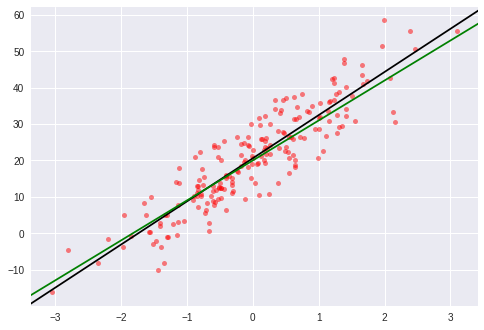

In [69]:
fig, ax = plt.subplots()

ax.plot(X,y,'r.',alpha=0.5,markersize=10)
ax.plot(predx, min_w0 + min_w1*predx,'k')
ax.plot(predx, coef * predx + bias ,'g')
ax.set_ylim(ax1.get_ylim())
ax.set_xlim(ax1.get_xlim())